In [1]:
# Import the usual libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches

# Enable inline plotting
%matplotlib inline

# Progress bar
from tqdm.auto import trange, tqdm

In [2]:
import pynrc
from pynrc import nircam_dark

# Initialize SCA Dark

In [3]:
datadir='/Users/jarron/NIRCam/Data/CV3_Darks/'
outdir='/Users/jarron/NIRCam/dark_analysis/CV3/'
dark_data = nircam_dark(485, datadir, outdir)

/Users/jarron/NIRCam/dark_analysis/CV3/485/HEADER_485.TXT
[     pynrc:INFO] RAPID readout mode selected.
[     pynrc:INFO] Setting ngroup=108, nf=1, nd1=0, nd2=0, nd3=0.
[     pynrc:INFO] Initializing SCA 485/A5


In [4]:
# Dark ramp/slope info

# Get Super dark ramp (cube)
dark_data.get_super_dark_ramp()

# Calculate dark slope image
dark_data.get_dark_slope_image()
dark_data.get_super_bias_update()

# Calculate pixel slope averages
dark_data.get_pixel_slope_averages()

[     pynrc:INFO] Generating initial super bias
[     pynrc:INFO] Creating super dark ramp cube, updated super bias, and pixel mask info
[     pynrc:INFO] Calculating dark slope image...
[     pynrc:INFO] Opening updated super bias
[     pynrc:INFO] Calculating average pixel ramps...


In [5]:
# Calculate CDS Noise for various component 
# white noise, 1/f noise (correlated and independent), temporal and spatial
dark_data.get_cds_dict()

# Effective Noise
dark_data.get_effective_noise()

# Get kTC reset noise, IPC, and PPC values
dark_data.get_ktc_noise()

# Get the power spectrum information
# Saved to pow_spec_dict['freq', 'ps_all', 'ps_corr', 'ps_ucorr']
dark_data.get_power_spectrum(include_oh=False, calc_cds=True, mn_func=np.median, per_pixel=False)

[     pynrc:INFO] Building CDS Noise dictionaries...
[     pynrc:INFO]   Best fit excess variance model parameters: [1.41538086 7.78820252]
[     pynrc:INFO] Calculating kTC Noise for active and reference pixels...
[     pynrc:INFO] Building noise power spectrum dictionary...


In [6]:
# Calculate IPC/PPC kernels
dark_data.get_ipc(calc_ppc=True)
# Deconvolve the super dark and super bias images
dark_data.deconvolve_supers()

[     pynrc:INFO] Calculating IPC and PPC kernels...
[     pynrc:INFO]   IPC = 0.597% +/- 0.004%
[     pynrc:INFO]   PPC = 0.123% +/- 0.010%
[     pynrc:INFO] Deconvolving super dark and super bias images...


PPC Amps:   0%|          | 0/4 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

PPC Amps:   0%|          | 0/4 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

Frames:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# Get column variations
dark_data.get_column_variations()
# Create dictionary of reference pixel behavior
dark_data.get_ref_pixel_noise()

[     pynrc:INFO] Determining column variations (RTN)
[     pynrc:INFO] Determining reference pixel behavior


# Plot SCA Characteristics

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_dark_ramp_avg.pdf


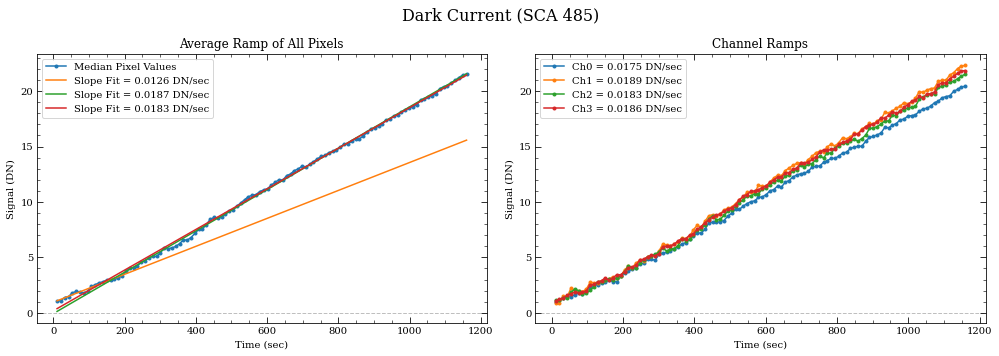

In [13]:
dark_data.plot_dark_ramps(save=True, time_cut=200)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_dark_ramp_chans.pdf


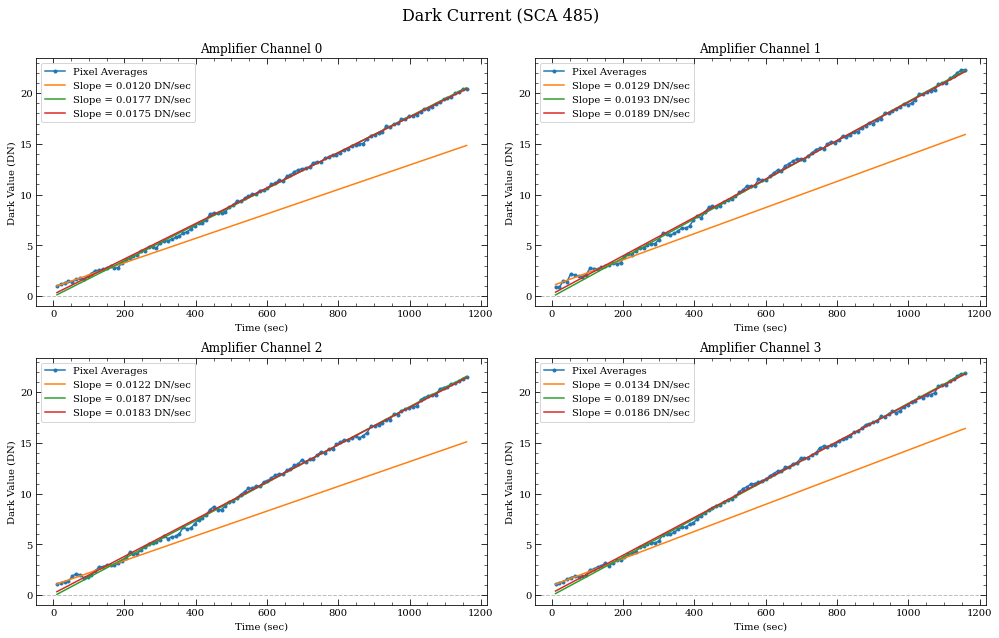

In [12]:
dark_data.plot_dark_ramps_ch(save=True, time_cut=200)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_bias_dark_images.pdf


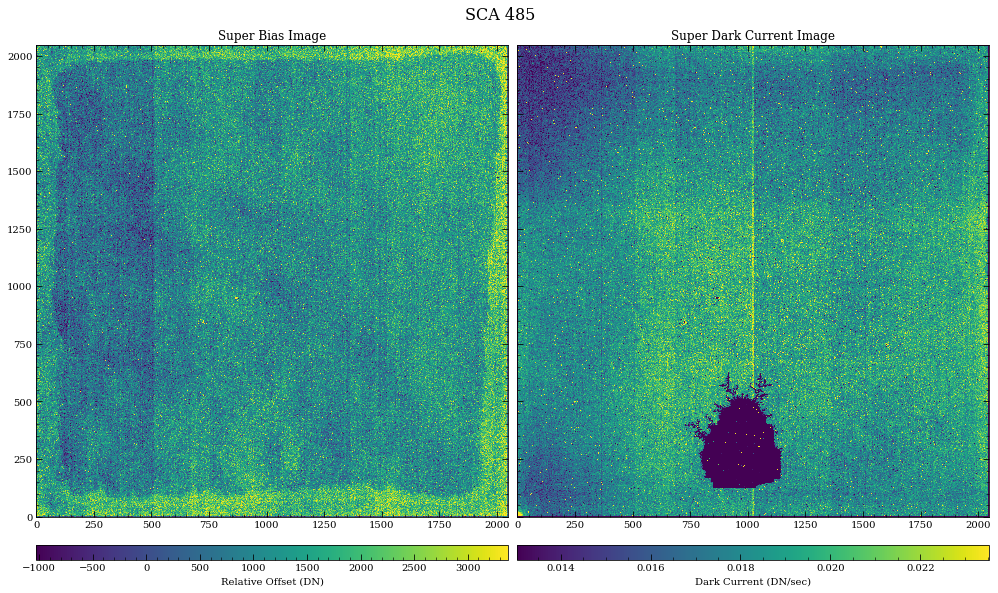

In [14]:
dark_data.plot_bias_darks(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_dark_histogram.pdf


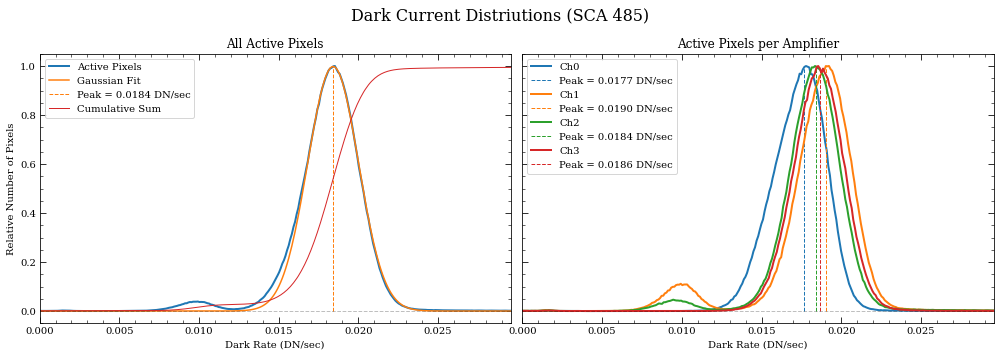

In [15]:
dark_data.plot_dark_distribution(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_dark_overview.pdf


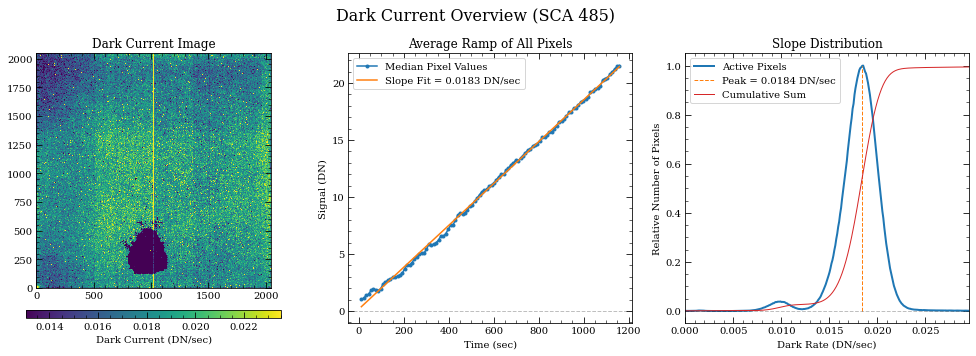

In [16]:
dark_data.plot_dark_overview(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_bias_overview.pdf


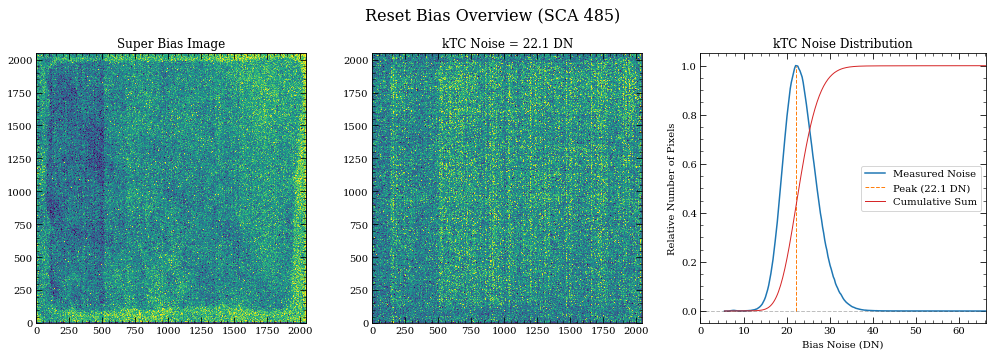

In [17]:
dark_data.plot_reset_overview(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_cds_noise.pdf


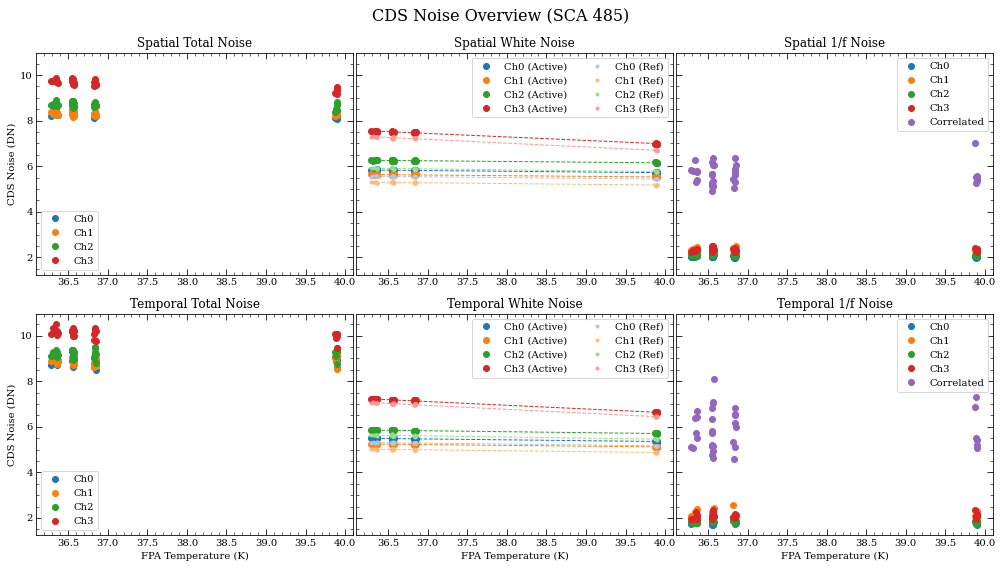

In [21]:
dark_data.plot_cds_noise(save=True, xlim=[36.1, 40.1])

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_eff_noise_patterns.pdf


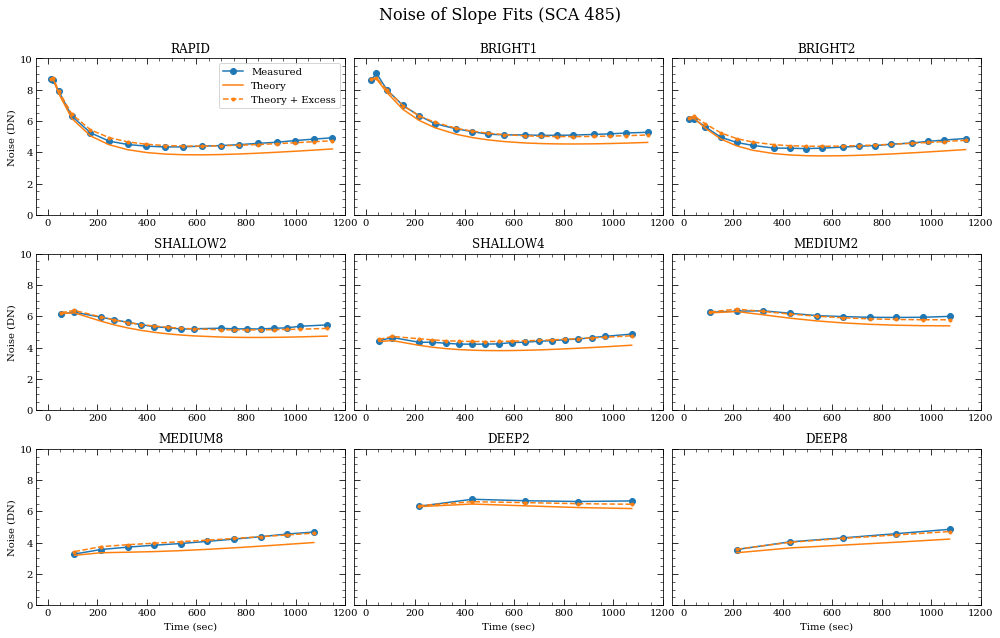

In [22]:
dark_data.plot_eff_noise_patterns(save=True, ylim=[0,10])

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_eff_noise.pdf


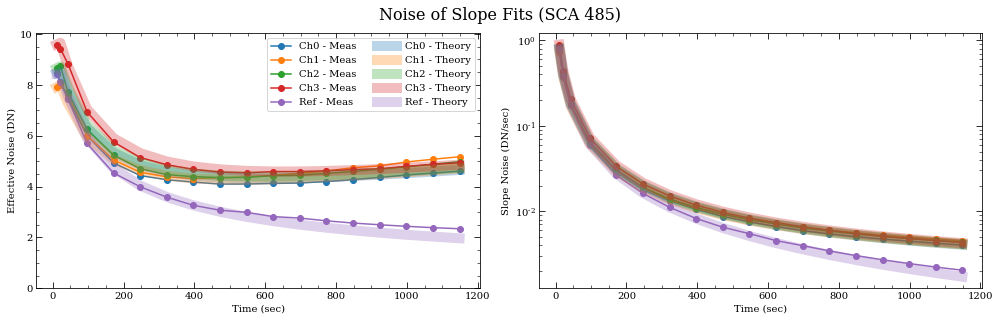

In [23]:
dark_data.plot_eff_noise(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_power_spectra.pdf


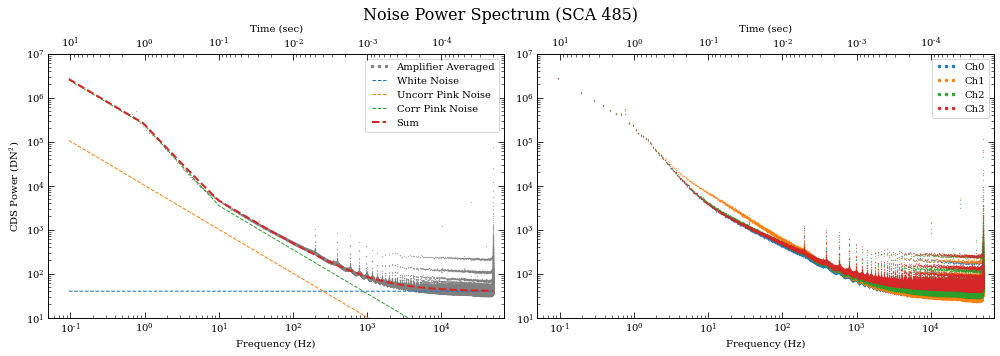

In [24]:
dark_data.plot_power_spectrum(save=True)

[     pynrc:INFO] Saving to /Users/jarron/NIRCam/dark_analysis/CV3/485/FIGURES/485_pixel_kernels.pdf


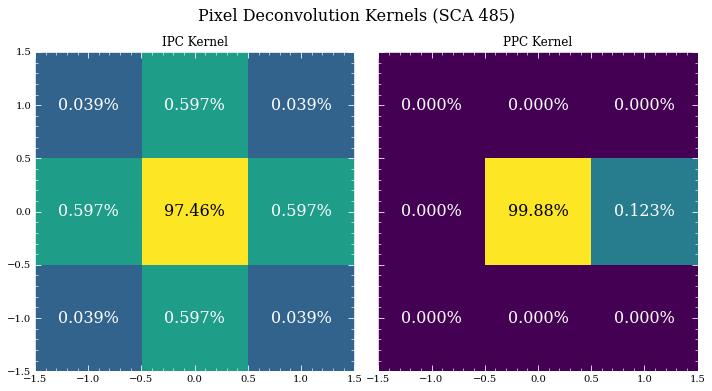

In [25]:
dark_data.plot_ipc_ppc(save=True)